# Health, Wellness & Fitness EDA

This dataset is originally from the Upcloud Technology Digitalising the Healthcare Industry. The objective of the dataset is to health-tech sector aiming to connect patients and doctors digitally. We are taking a step by step approach in digitising the health-care sector as a whole. We believe firmly in quality and customer care, and aim to deliver it through all the solutions that we offer. We provide software services through our own custom made applications.
We believe that health should be as accessible to individuals as food, shopping etc. and our tireless endeavours aim to establish the same.
age_Age (years)	

anaemia	creatinine_phosphokinase_ANEMIA and ELEVATED SERUM CREATINE PHOSPHOKINASE related symptoms, diseases, and genetic alterations	

diabetes_a disease in which the body’s ability to produce or respond to the hormone insulin is impaired, resulting in abnormal metabolism of carbohydrates and elevated levels of glucose in the blood.

ejection_fraction_expressed as a percentage, of how much blood the left ventricle pumps out with each contraction

high_blood_pressure_Hypertension (HTN or HT), also known as high blood pressure (HBP)

platelets_Platelets, also called thrombocytes are a component of blood whose function is to react to bleeding from blood vessel injury by clumping

serum_creatinine_a nitrogenous compound formed as the end product of creatine metabolism

serum_sodium_A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). Hyponatremia occurs when the sodium in your blood falls below 135 mEq/L.

sex_ MALE and FEMALE (0\1)

smoking_Here the somking person male \female

time_Time gives us in HOURS

DEATH_EVENT_In nearly all circumstances human death is a process rather than an event


In [1]:
#importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as mno

In [2]:
#importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [3]:
data=pd.read_csv('datasets_727551_1263738_heart_failure_clinical_records_dataset.csv')#dataset
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
data.shape

(299, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [9]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [10]:
data.drop('anaemia',axis=1,inplace = True)

In [11]:
data.head()

,age,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,160,1,20,0,327000.00,2.7,116,0,0,8,1


<AxesSubplot:>

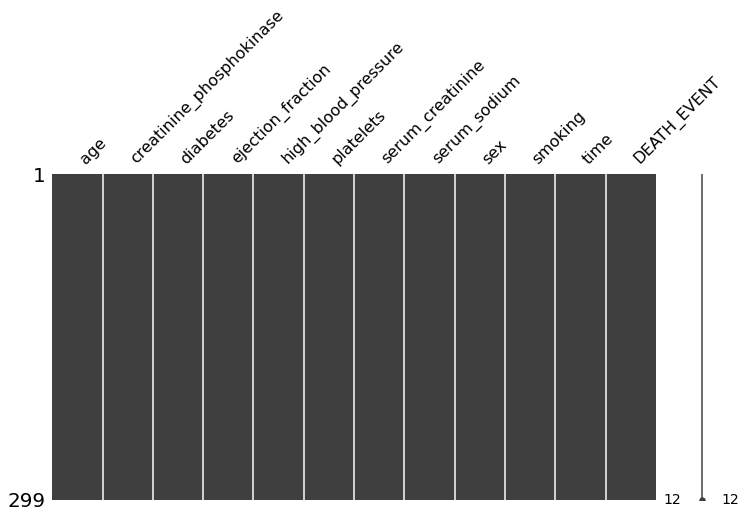

In [12]:
mno.matrix(data, figsize = (12, 6))

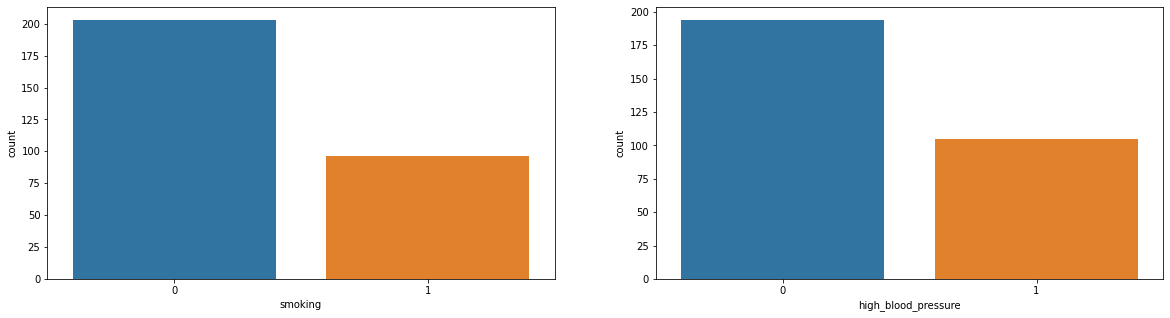

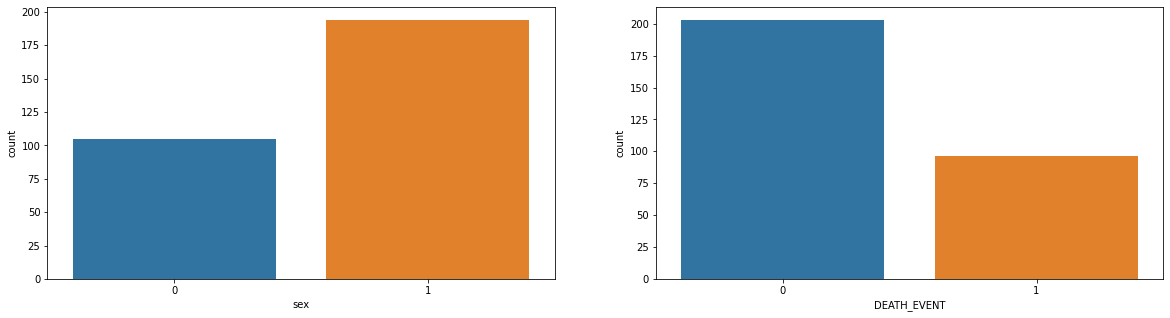

In [13]:
cat_cols = ['smoking','high_blood_pressure','sex','DEATH_EVENT']
i=0
while i < 4:
    fig = plt.figure(figsize=[20,5])
    
    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1
    
    plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   creatinine_phosphokinase  299 non-null    int64  
 2   diabetes                  299 non-null    int64  
 3   ejection_fraction         299 non-null    int64  
 4   high_blood_pressure       299 non-null    int64  
 5   platelets                 299 non-null    float64
 6   serum_creatinine          299 non-null    float64
 7   serum_sodium              299 non-null    int64  
 8   sex                       299 non-null    int64  
 9   smoking                   299 non-null    int64  
 10  time                      299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


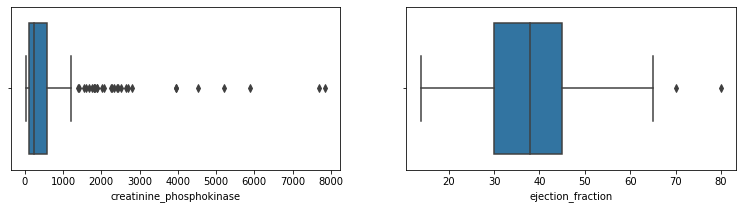

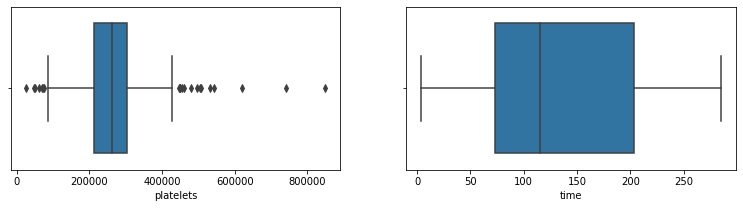

In [15]:
num_cols = ['creatinine_phosphokinase','ejection_fraction','platelets','time']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
   
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
   
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    plt.show()

# Outliers Analysis

In [16]:
data[data['platelets'] > data['platelets'].quantile(0.99)].sort_values(by="platelets",ascending=False)

,age,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
109,45.0,292,1,35,0,850000.0,1.3,142,1,1,88,0
296,45.0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
105,72.0,328,0,30,1,621000.0,1.7,138,0,1,88,1


In [17]:
data[data['serum_sodium'] > data['serum_sodium'].quantile(0.99)].sort_values(by="serum_sodium",ascending=False)

,age,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
236,75.0,119,0,50,1,248000.00,1.1,148,1,0,209,0
52,60.0,3964,1,62,0,263358.03,6.8,146,0,0,43,1


Highest serum_sodium is  148

In [18]:
data[data['ejection_fraction'] > data['ejection_fraction'].quantile(0.99)].sort_values(by="ejection_fraction",ascending=False)

,age,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,427,0,70,1,151000.00,9.00,137,0,0,196,1
8,65.0,157,0,65,0,263358.03,1.50,138,0,0,10,1


Highest ejection_fraction is  80

In [19]:
data.sort_values(by="platelets")

,age,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
277,70.0,582,1,38,0,25100.0,1.1,140,1,0,246,0
15,82.0,379,0,50,0,47000.0,1.3,136,1,0,13,1
281,70.0,582,0,40,0,51000.0,2.7,136,1,1,250,0
230,60.0,166,0,30,0,62000.0,1.7,127,0,0,207,1
167,59.0,66,1,20,0,70000.0,2.4,134,1,0,135,1
...,...,...,...,...,...,...,...,...,...,...,...,...
240,70.0,81,1,35,1,533000.0,1.3,139,0,0,212,0
287,45.0,582,1,55,0,543000.0,1.0,132,0,0,250,0
105,72.0,328,0,30,1,621000.0,1.7,138,0,1,88,1
296,45.0,2060,1,60,0,742000.0,0.8,138,0,0,278,0


In [20]:
data["age"].value_counts().sort_values(ascending=False).head(20).iplot(kind="bar")

60 year old patient have the highest listing 

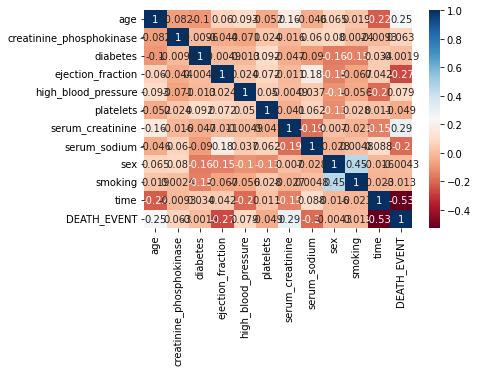

In [21]:
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

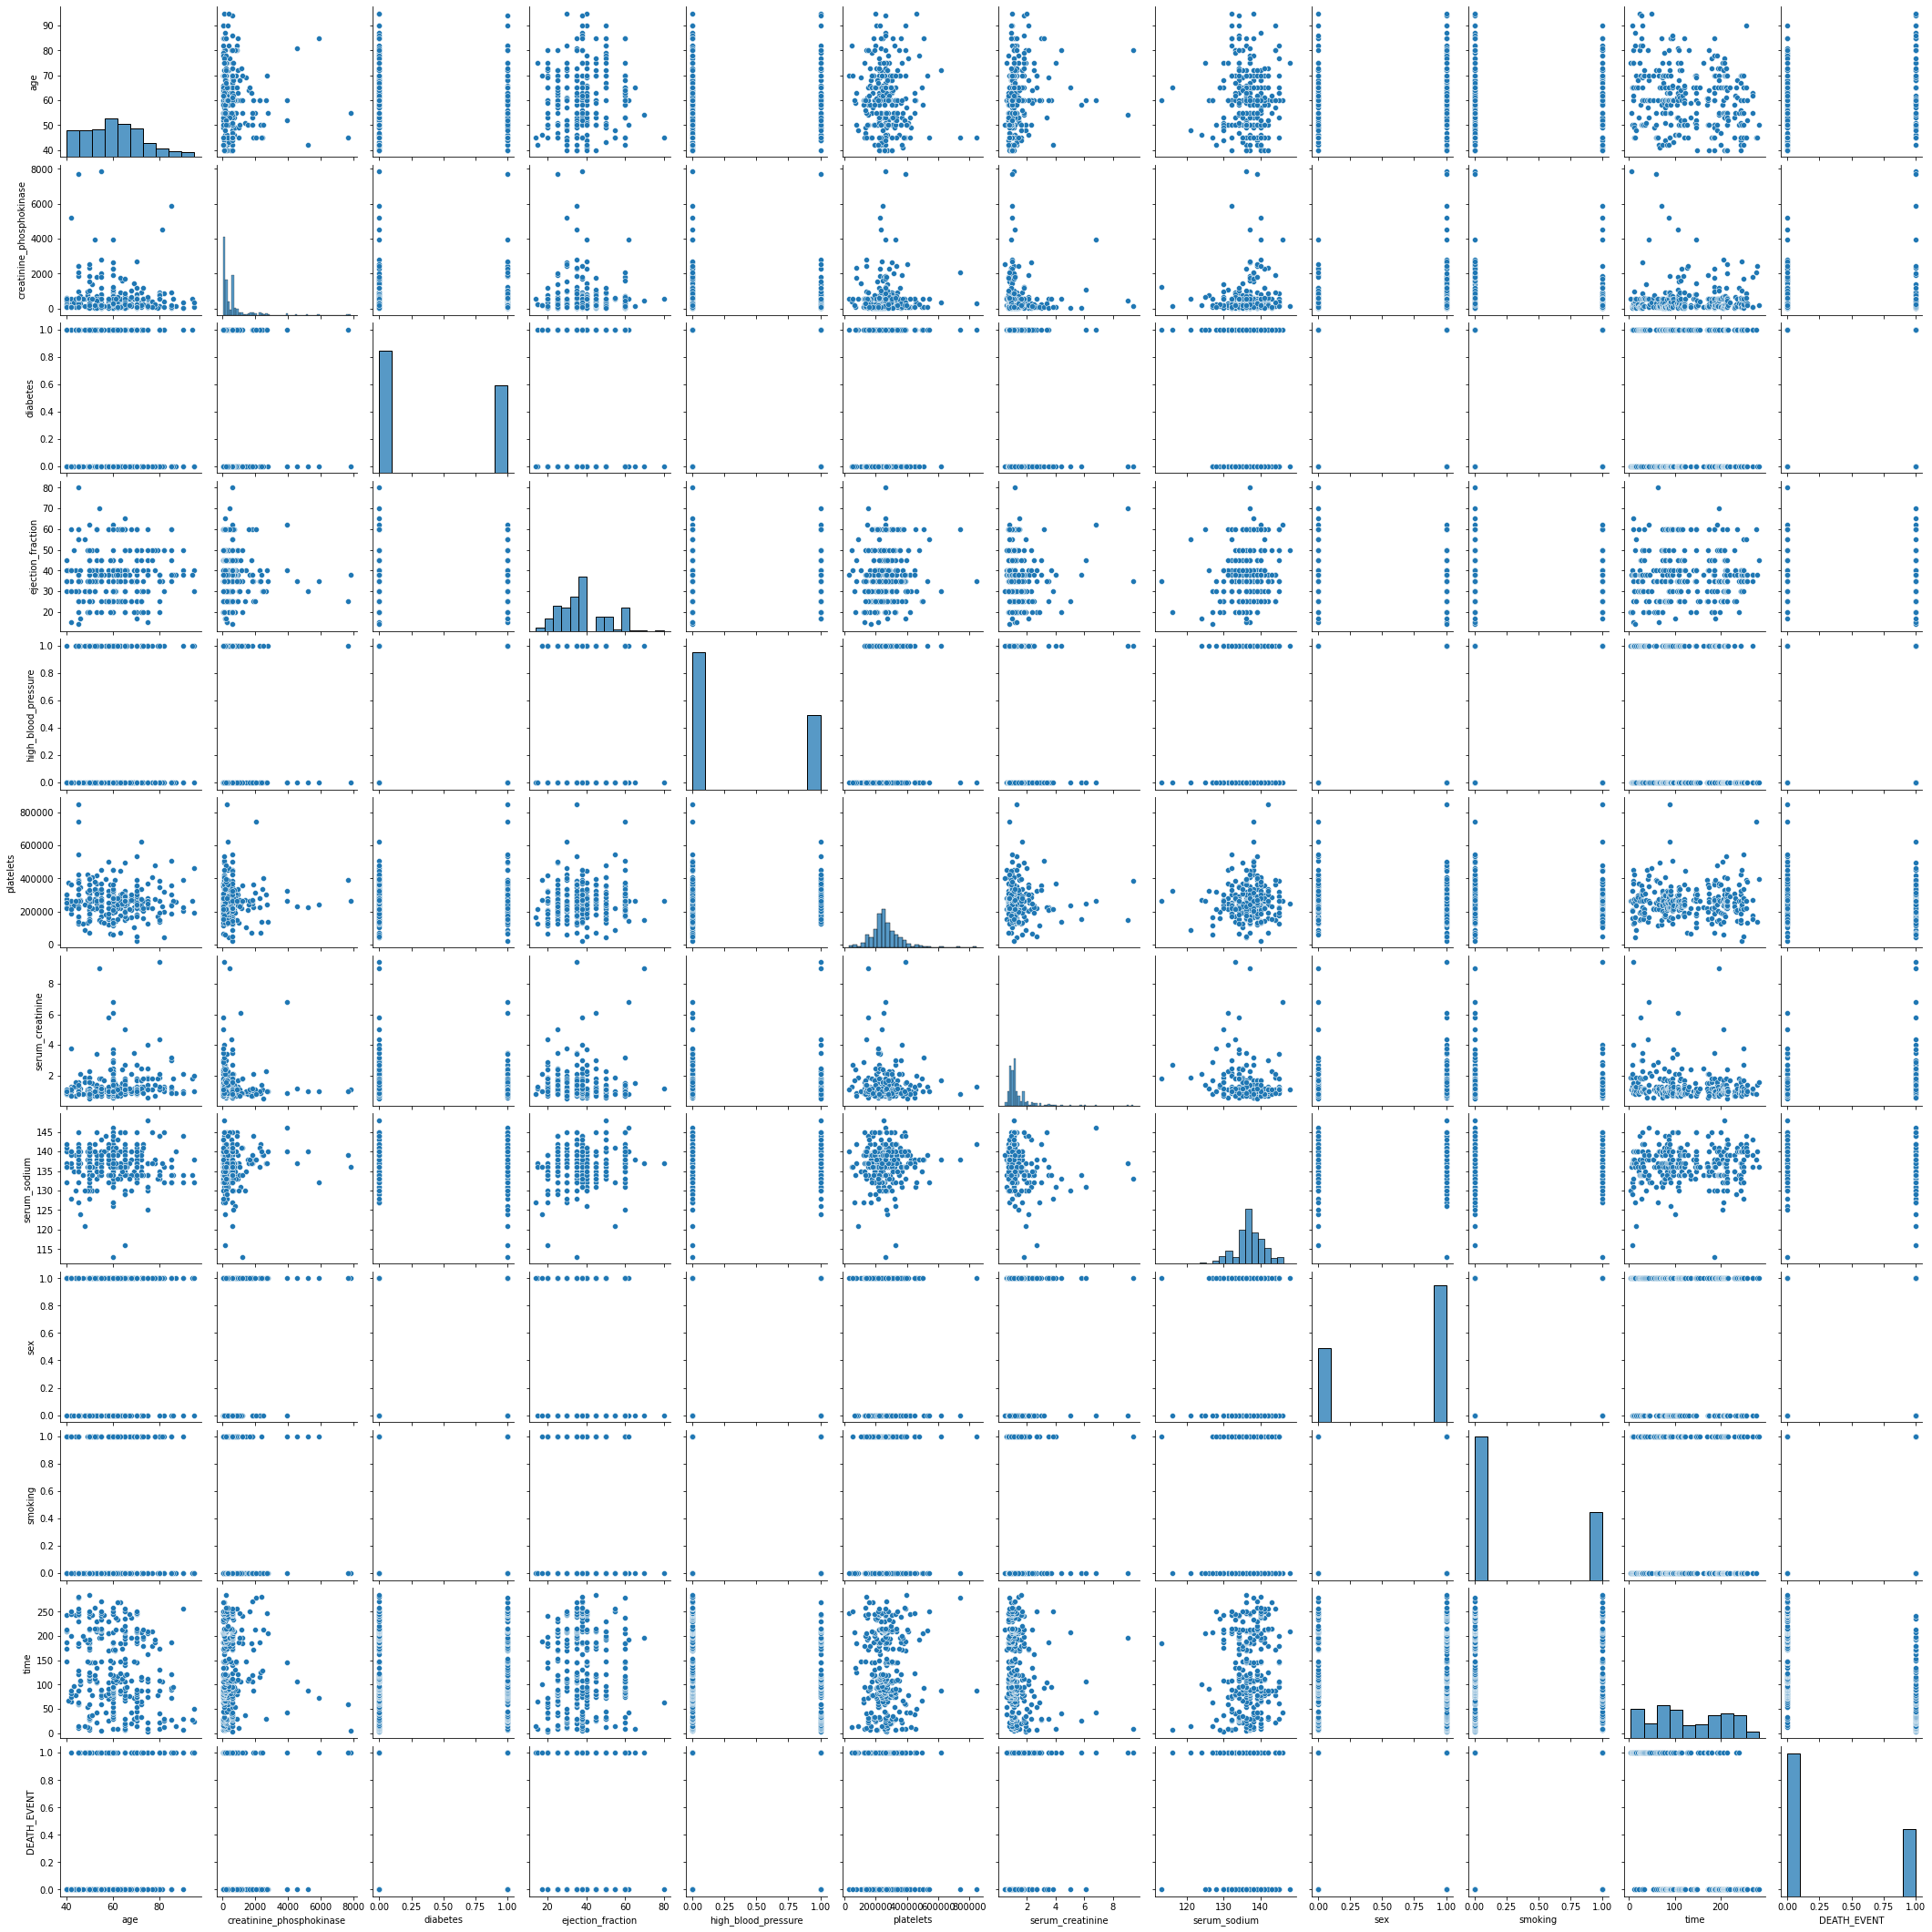

In [22]:
sns.pairplot(data)

In [ ]:
sns.pairplot(data, hue = "DEATH_EVENT")

In [ ]:
num_cols = ['age','creatinine_phosphokinase','serum_creatinine','ejection_fraction','serum_sodium','platelets']
i=0
while i < 6:
    fig = plt.figure(figsize=[13,4])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
        
    plt.show()

In [ ]:
data.DEATH_EVENT.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')